# Name:dd
# Time:2018.2.5
# Title：BP神经网络原理研究

# ——————————————————————————————

# 有一个单细胞生物，生活在糖水和盐水混合物中，糖水盐水在不停的流动，它有两个鞭毛，分别可以感知糖水和盐水，当总浓度到达一定值时，就会吃这些糖水盐水

![](神经元.png)  ![](ANN.jpg)

# 但是，同时吃进糖水和盐水，会造成细胞结石，有损细胞健康


# 慢慢地，单细胞生物慢慢和其它细胞一起，组成了多细胞生物，进化出了一个能力，有糖水吃糖水，有盐水吃盐水，同时都有的话就不吃，防止细胞里面无法同时消化两种物体。

![](多神经元.png)
![](ANNNetwork.jpg)

# 下面，我们用人工神经元网络来模拟从单细胞到多细胞的进化过程
# 首先，画出最终的输入输出函数3维曲线。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x1=np.arange(0,2,1)
x2=np.arange(0,2,1)

X,Y=np.meshgrid(x1, x2)    # x-y 平面的网格
Z=np.logical_xor(X,Y)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax.contour(X, Y, Z, offset = -0.5, cmap = 'rainbow')
ax.set_zlim(-1, 1)

plt.show()

print(X)
print(Y)
print(Z)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格


R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z= np.sin(R)
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

# 绘制从3D曲面到底部的投影
#ax.contour(X, Y, Z, zdim = 'z', offset = -2, cmap = 'rainbow')

# 设置z轴的维度
ax.set_zlim(-2, 2)

plt.show()


# 用神经网络来学习XOR函数迭代版

In [ ]:
import numpy as np  # Note: there is a typo on this line in the video

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,5,0.2)

y=x*x+np.sqrt(x+1)-3*x

y0=(x+x)*0

#print(x,y)

plt.plot(x,y)
plt.plot(x,y0)

plt.show()

#print("x,y,y1,yh")

x=0.5
#print(x)
yl=x*x+np.sqrt(x+1)-3*x
#print(yl)

x=2.1824
#print(x)
yh=x*x+np.sqrt(x+1)-3*x
#print(yh)




# 首先，定义一个sigmod函数

In [280]:
def nonlin(x, deriv=False):  
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))

# 1/(1+exp(-x)) 导数推导

(1/(1+exp(-x)))'=((1+exp(-x))^-1)'=(-1)((1+exp(-x))^-2)(1+exp(-x))'=(-1)((1+exp(-x))^-2)(exp(-x))'
而(exp(-x))'可以先转成(exp(x)^-1)'，于是她又是一个复合函数的求导，即(exp(x)^-1)对exp(x)的导数再乘上exp(x)对x的导数，又基本初等函数求导公式告诉我们，(exp(x))'=exp(x)，所以(exp(-x))'=(exp(x)^-1)'=(-1)(exp(x)^-2)(exp(x))'=(-1)(exp(x)^-2)exp(x)=(-1)(exp(x)^-1)=(-1)exp(-x)
那么：
(-1)((1+exp(-x))^-2)(exp(-x))'=(-1)((1+exp(-x))^-2)(-1)exp(-x)=exp(-x)((1+exp(-x))^-2)=exp(-x)/((1+exp(-x))^2) 

![](dsigmoid.png)


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,2)
y=nonlin(x)
#print(y)
plt.plot(x,y)
plt.show()


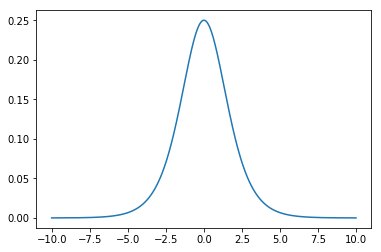

In [282]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.01)
y=1/(1+np.exp(-x))
yderiv=nonlin(y,deriv=True)
plt.plot(x,yderiv)
plt.show()


# 复习一下表格试凑法

![](weights_solution.png)

![](BPBSYN0SYN1.png)

In [ ]:
syn0=np.array([[-99,-99,99,99.0],
              [-99,99,-99,99],
              [99,0,0,99]])
#print(syn0)

syn1=np.array([[0],
              [1.0],
              [1.0],
              [0]])



# 所有可能的输入值放在一个向量中

In [304]:
#input data
xinputs = np.array([[0,0,1], 
            [0,1,1],
            [1,0,1],
            [1,1,1]])
l0=xinputs

# 计算第一层的线性输出


In [ ]:
SO1=np.dot(xinputs,syn0)
#print(SO1)

In [ ]:
l1=nonlin(SO1)
#print(l1)

In [ ]:
SO2=np.dot(l1,syn1)
#print(SO2)

In [ ]:
l2=nonlin(SO2)
#print(l2)

# 希望的的输出结果

In [309]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

# 误差是

In [ ]:
l2_error=y-l2
#print(l2_error)

# 为了直观地得出总误差多大，引入绝对值平均值lmabs

In [ ]:
#误差的平均绝对为
lms=np.mean(np.abs(l2_error))
print(lms)

sk=[]
yerrorlmss=[]
syn1_0=[]
sks=0

syn1_0.append(syn1[0,0])
sk.append(sks)
yerrorlmss.append(lms)
sks=sks+1


# 误差反向传播

![](syn01delta.png)

# 利用误差修正第二层权值网络

In [312]:
l2_delta = l2_error*nonlin(l2, deriv=True)

In [ ]:
#print(l2_delta)

# 计算第一层的误差

In [ ]:
#print(syn1)

In [ ]:
#print(syn1.T)

In [ ]:
l1_error = l2_delta.dot(syn1.T)
#print(l1_error)

# 计算第一层的修正值

In [ ]:
l1_delta = l1_error * nonlin(l1,deriv=True)
#print(l1_delta)

# 修正权值网络

In [318]:
syn1 += l1.T.dot(l2_delta)
syn0 += l0.T.dot(l1_delta)    

In [ ]:
#print(syn0)
#print(syn1)

![](syn01delta.png)

# 机器迭代最终答案

In [ ]:
for j in range(100):  
    
    #print("start forward calulate")
    l0 = xinputs
    #print("l0")
    #print(l0)    
    l1 = nonlin(np.dot(l0, syn0))
    #print("l1")
    #print(l1)
    l2 = nonlin(np.dot(l1, syn1))
    #print("l2")
    #print(l2)
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    
    #print("l2")
    #print(l2)
    
    #print("l2_error")
    #print(l2_error)
    
    lms=np.mean(np.abs(l2_error))
    syn1_0.append(syn1[0,0])
    sk.append(sks)
    yerrorlmss.append(lms)
    sks=sks+1
    
    #print("Error:")
    #print(lms)
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    #print("nonline derive")
    #print(nonlin(l2,deriv=True))
    
    #print("l2_delta")      
    #print(l2_delta)
          
#    l1_error = l2_delta.dot(syn1.T)
    
    #print("syn1.T")
    #print(syn1.T)
    
    #print("l1_error")
    #print(l1_error)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    #print("nonlin(l1,deriv=True)")
    #print(nonlin(l1,deriv=True))
        
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    #print("syn0 syn1")
    
    #print(syn0)
    #print(syn1)
    
print("Output after training")
print(l2)

print(syn1_0)
print(yerrorlmss)
   

# 作业：
# 1.画出syn1[0] 的值在迭代过程中与Error的绝对值平均值yerrorlmss的对应关系曲线。
# 2.画出迭代过程中syn1_0的 变化曲线
# 3.画出迭代过程中yerrorlmss的 变化曲线

提示：
1. syn1[0]从0开始，到-4.8315   
2. 声明list,然后append值,变量名syn1_0,yerrorlmss
3. 为了画出横坐标为迭代次数的图，需要创建对应顺序值，list命名为sk，变量名命名为sks，利用append添加每次的顺序值。
4. j循环体内以及j循环体前面的初始值均需要考虑



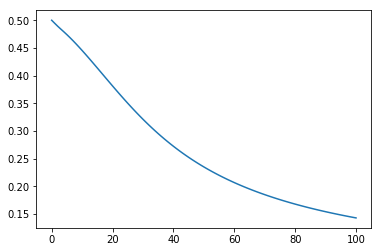

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0.5, 0.49448427379942766, 0.4890968219722739, 0.4840676097699067, 0.47911040636144164, 0.4740046148614543, 0.46868011003476656, 0.4631376690181409, 0.4574002447634065, 0.45149451553847053, 0.44544547931530537, 0.4392756545828189, 0.43300558432645025, 0.42665448414009, 0.4202407044959697, 0.41378197236040015, 0.40729546383860443, 0.4007977704604252, 0.3943048097861456, 0.3878317155610476, 0.38139272968291266, 0.3750011088332089, 0.3686690522629734, 0.36240765311770357, 0.35622687313103363, 0.35013553899701483, 0.34414135789054745, 0.33825094920963655, 0.33246988950724393, 0.3268027676623294, 0.321

In [321]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=sk
y=yerrorlmss
plt.plot(x,y)
plt.show()
print(x)
print(y)



# 画出迭代过程中syn1_0值的变化趋势

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=sk
y=yerrorlmss
plt.plot(x,y)
plt.show()


# 画出迭代过程中，yerrorlms变化趋势

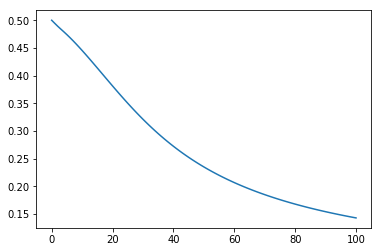

In [323]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x=sk
y=yerrorlmss

plt.plot(x,y)
plt.show()


# 作业：修改迭代次数，根据yerrolms的趋势，确定迭代次数的最佳值